In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Lasso,Ridge,RidgeCV,LassoCV
from sklearn.metrics import r2_score
import seaborn as sns

In [26]:
df = sns.load_dataset('diamonds')
df.loc[df['price'].idxmax()]

carat         2.29
cut        Premium
color            I
clarity        VS2
depth         60.8
table         60.0
price        18823
x              8.5
y             8.47
z             5.16
Name: 27749, dtype: object

In [3]:
cat = ['cut', 'color', 'clarity']
num = ['carat','depth','table','x','y','z']

preprocessor = ColumnTransformer([
    ('encoder',OneHotEncoder(handle_unknown='ignore',drop='first'),cat),
    ('scaler',StandardScaler(),num)
])

param_grid = {
    'model__alpha':[0.001,0.01,1,10,100],
    'poly__degree':[2,3]
}

In [4]:
X = df.drop('price', axis = 'columns')
Y = np.log(df['price'])

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [6]:
pipeline = Pipeline([
    ('preprocessing',preprocessor),
    ('poly',PolynomialFeatures(include_bias=False)),
    ('model',Ridge()),
])

In [7]:
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                                          'x',
                                                                          'y',
                                                                          'z'])])),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0.001, 0.01, 1, 10, 100],
                         'poly__degree': [2, 3]},
             scoring='r2')

In [8]:
model = grid.best_estimator_

In [9]:
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

0.9856724239360631

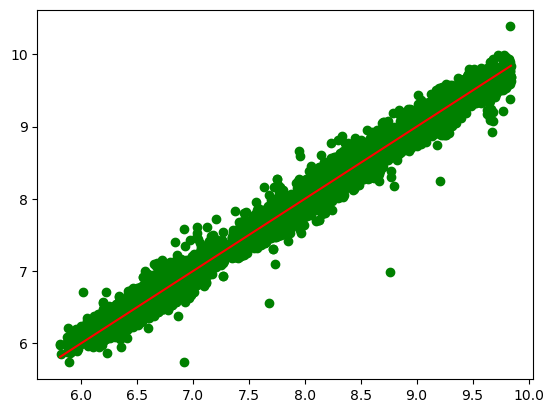

In [10]:
plt.plot([y_test.min(),y_test.max()],
        [y_test.min(),y_test.max()],color='red')
plt.scatter(y_test,y_pred,color='green')

In [11]:
x_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
26546,2.01,Good,F,SI2,58.1,64.0,8.23,8.19,4.77
9159,1.01,Very Good,E,SI2,60.0,60.0,6.57,6.49,3.92
14131,1.10,Premium,H,VS2,62.5,58.0,6.59,6.54,4.10
15757,1.50,Good,E,SI2,61.5,65.0,7.21,7.17,4.42
24632,1.52,Very Good,G,VS1,62.1,57.0,7.27,7.32,4.53


In [12]:
def makePrediction(carat,cut,color,clarity,depth,table,x,y,z):
    df = pd.DataFrame({
        "carat":[carat],
        "cut":[cut],
        "color":[color],
        "clarity":[clarity],
        "depth":[depth],
        "table":[table],
        "x":[x],
        "y":[y],
        "z":[z]
    })

    prediction = model.predict(df)
    return print(f"Price: {np.exp(prediction[0])}")

In [13]:
makePrediction(1.52,"Very Good","G", "VS1",62.1,57.0,7.27,7.32,4.53)

Price: 13194.72486641507


In [14]:
df.loc[(df['y'] == 7.32) & (df['cut'] == "Very Good") & (df['z'] == 4.53)]

,carat,cut,color,clarity,depth,table,price,x,y,z
18229,1.50,Very Good,J,VS2,62.4,60.0,7402,7.21,7.32,4.53
21640,1.51,Very Good,E,SI2,61.8,57.0,9731,7.34,7.32,4.53
24632,1.52,Very Good,G,VS1,62.1,57.0,12968,7.27,7.32,4.53
25724,1.50,Very Good,E,VS2,62.1,60.0,14639,7.27,7.32,4.53


In [15]:
import joblib

In [17]:
joblib.dump(model,"diamond_price_model.pkl")

['diamond_price_model.pkl']

In [20]:
model = joblib.load("diamond_price_model.pkl")
print(type(model))

<class 'sklearn.pipeline.Pipeline'>
